### Natural Language Processing or NLP 
is a field of artificial intelligence that gives the machines the ability to read, understand and derive meaning from human languages.

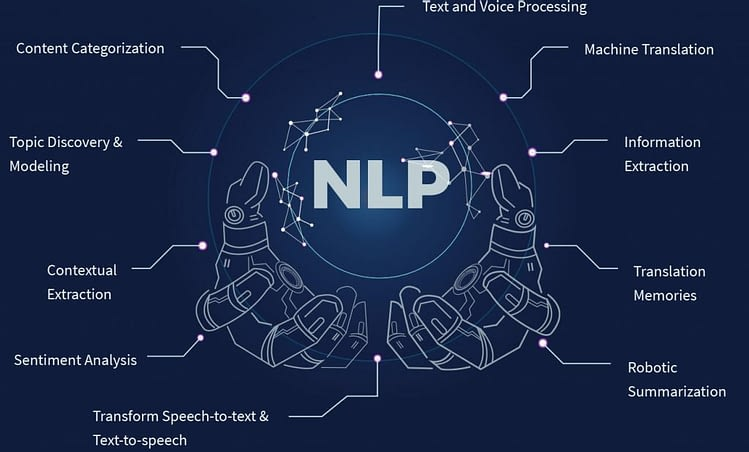

# Now we are going to perform some of the NLP basic task with Spacy 

#### General Feature Extraction

- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts

#### Preprocessing and Cleaning

- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of RT
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt Sentiment Classifier

#### Advanced Text Processing and Feature Extraction

- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF Term Frequency – Inverse Document Frequency
- Word Embedding Word2Vec using SpaCy

# Machine Learning Models for Text Classification

- SGDClassifier
- LogisticRegression
- LogisticRegressionCV
- LinearSVC
- RandomForestClassifier

# Spacy

- SpaCy is an open-source software library that is published and distributed under MIT license, and is developed for performing simple to advanced Natural Language Processing (N.L.P) tasks such as tokenization, part-of-speech tagging, named entity recognition, text classification, calculating semantic similarities between text, lemmatization, and dependency parsing, among others.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [4]:
df = pd.read_csv('twitter16m.csv', encoding = 'latin1', header = None)
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df = df[[5, 0]]
df.columns = ['twitts', 'sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [6]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
sent_map = {0: 'negative', 4: 'positive'}

# 1. Word Counts

In [8]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# 2. Characters Count

In [9]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))
df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


# 3. Average Word Length

In [10]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # != len(x)/len(words)

In [11]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))
len('this is nlp lesson')/4

4.5

In [12]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


# 4. Stop Words Count

In [16]:
print(STOP_WORDS)

{'without', 'fifteen', 'below', 'please', 'five', 'due', 'nor', "'d", 'sometime', 'however', 'towards', 'same', 'take', 'seemed', 'ourselves', 'latterly', 'behind', 'per', 'whom', 'whose', "'ve", 'go', 'to', 'bottom', 'whatever', 'against', 'anyhow', 'quite', 'am', 'nowhere', 'down', 'more', 'yet', 'n’t', 'well', 'been', 'had', 'at', 'why', 'forty', 'himself', 'than', 'third', '‘d', 'wherever', 'become', 'off', 'were', 'together', 'a', 'upon', 'serious', 'over', 'nobody', 'somehow', 'enough', 'mostly', 'back', '’s', 'by', 'thereupon', 'any', 'part', 'across', 'empty', 'when', '’re', 'with', 'too', 'that', 'less', 'therein', 'out', 'every', 'which', '‘ve', 'it', 'until', 'can', 'during', 'they', 'was', 'thus', 'whereas', 'mine', '‘re', 'between', 'whether', 'your', 'alone', 'hers', 'keep', 'her', 'sixty', "'m", 'call', '‘ll', 'on', "n't", 'again', 'about', 'in', 'you', 'became', 'n‘t', 'ca', 'since', 'herein', 'unless', 'is', 'also', '‘m', 'show', 'some', 'do', 'something', 'but', 'last

In [17]:
x = 'this is text data'
x.split()

['this', 'is', 'text', 'data']

In [18]:
len([t for t in x.split() if t in STOP_WORDS])

2

In [19]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


# 5. Count #HashTags and @Mentions

In [20]:
x = 'this #hashtag and this is @mention'
# x = x.split()
# x
[t for t in x.split() if t.startswith('@')]

['@mention']

In [21]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


# 6. If numeric digits are present in twitts

In [22]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


# 7. UPPER case words count

In [23]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [24]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

# Preprocessing and Cleaning

# 1. Lower case conversion

In [25]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0


# 2. Contraction to Expansion
In this section, we are converting all short words to their respective fullwords based on the words defined in the dictionary and using function cont_to_exp().

In [26]:
x = "i don't know what you want, can't, he'll, i'd"

In [27]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [28]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [29]:
cont_to_exp(x)

'i do not know what you want, cannot, he will, i would'

In [30]:
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


# 3. Count and Remove Emails

In [37]:
import re
x = 'hi my email me at email@email.com another@email.com'
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

['email@email.com', 'another@email.com']

In [38]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)

'hi my email me at  '

In [32]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))
df['emails_count'] = df['emails'].apply(lambda x: len(x))
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [39]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1,0
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1,0
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1,0
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1,0
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1,0


# 4. Count URLs and Remove it

In [33]:
x = 'hi, to watch more visit https://youtube.com/sajibhalder'
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)


[('https', 'youtube.com', '/sajibhalder')]

In [35]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)

'hi, to watch more visit '

In [40]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [41]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [42]:
df.loc[0]['twitts']

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

# 5. Remove RT
In this section, we are removing retweet characters.

In [44]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


# 6. Special Chars removal or punctuation removal

In [45]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


# 7. Remove multiple spaces "hi   hello "

In [46]:
x = 'thanks    for    watching and    please    like my   work'
" ".join(x.split())

'thanks for watching and please like my work'

In [47]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


# 8. Remove HTML tags

In [48]:
from bs4 import BeautifulSoup
x = '<html><h2>Thanks for watching</h2></html>'
BeautifulSoup(x, 'lxml').get_text()

'Thanks for watching'

In [49]:
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0


# 9. Remove Accented Chars

In [50]:
import unicodedata
x = 'Áccěntěd těxt'
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x
remove_accented_chars(x)

'Accented text'

# SpaCy with NLP

# 10. Remove Stop Words

In [51]:
import spacy
x = 'this is stop words removal code is a the an how what'
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [52]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


# 11. Convert into base or root form of word

In [53]:
nlp = spacy.load('en_core_web_sm')
x = 'kenichan dived times ball managed save 50 rest'
# dive = dived, time = times, manage = managed
# x = 'i you he she they is am are'
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))
        
make_to_base(x)

kenichan dive times ball manage save 50 rest


# 12. Common words removal
In this section, we are removing top 20 most occured word from text corpus.

In [54]:
' '.join(df.head()['twitts'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [55]:
text = ' '.join(df['twitts'])
text = text.split()
freq_comm = pd.Series(text).value_counts()
f20 = freq_comm[:20]
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [56]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

# 13. Rare words removal
In this section, we are removing least 20 most occured word from text corpus.

In [57]:
rare20 = freq_comm[-20:]
rare20

mhhhwhatever       1
adrivalentin       1
kealie             1
ammyy              1
atlphil            1
ggumin             1
kennychia          1
netvision          1
crapwhat           1
gaaaaahhhh         1
lalalalalaoh       1
glassesjensen      1
schmeeny           1
theshawnshawnie    1
gripnow            1
woodburn           1
oneie              1
declancashin       1
takatophilip       1
actressl2          1
dtype: int64

In [58]:
rare = freq_comm[freq_comm.values == 1]
rare

eeeeeeeewwwwwwww    1
dinnert1me          1
schemehuh           1
joshwss             1
crunkkkk            1
                   ..
woodburn            1
oneie               1
declancashin        1
takatophilip        1
actressl2           1
Length: 536196, dtype: int64

In [59]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


# 14. Word Cloud Visualization

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
x = ' '.join(text[:20000])

In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


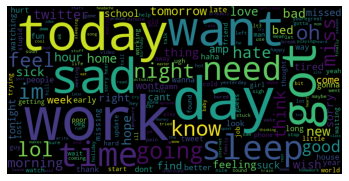

In [61]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

# 15. Spelling Correction

In [65]:
from textblob import TextBlob
x = 'tahnks forr waching this wokr '
x = TextBlob(x).correct()
x

TextBlob("thanks for watching this work ")

# 16. Tokenization
Tokenization is all about breaking the sentences into individual words.

In [67]:
x = 'thanks#watching my work. please like it'
TextBlob(x).words

WordList(['thanks', 'watching', 'my', 'work', 'please', 'like', 'it'])

In [68]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
my
work
.
please
like
it


# 17. Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.


In [69]:
x = 'runs run running ran'
from textblob import Word
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [70]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


# 18. Detect Entities using NER of SpaCy

Named Entity Recognition (NER) is a standard NLP problem which involves spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories. Some of the practical applications of NER include:

- Scanning news articles for the people, organizations and locations reported.
- Providing concise features for search optimization: instead of searching the entire content, one may simply search for the major entities involved.
- Quickly retrieving geographical locations talked about in Twitter posts.

In [71]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [72]:
from spacy import displacy
displacy.render(doc, style = 'ent')

# 19.Detecting Nouns

In [73]:
'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'
for noun in doc.noun_chunks:
    print(noun)

Breaking
News
Donald Trump
the president
the USA
a deal
the moon


# 20. Translation and Language Detection

In [74]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [75]:
tb = TextBlob(x)
tb.detect_language()

'en'

In [76]:
tb.translate(to='bn')

TextBlob("ব্রেকিং নিউজ: যুক্তরাষ্ট্রের রাষ্ট্রপতি ডোনাল্ড ট্রাম্প চাঁদটি খনির জন্য একটি চুক্তিতে সই করতে চাইছেন")

# 21. Use inbuilt sentiment classifier
TextBlob library also comes with a NaiveBayesAnalyzer, Naive Bayes is a commonly used machine learning text-classification algorithm.

In [77]:
from textblob.sentiments import NaiveBayesAnalyzer
x = 'we all stands together to fight with corona virus. we will win together'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [78]:
x = 'we all are sufering from corona'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

# Advanced Text Processing

# 1. N-Grams
An N-gram means a sequence of N words. So for example, “SAJIB's blog” is a 2-gram (a bigram), “A SAJIB's blog post” is a 4-gram, and “Write to me” is a 3-gram (trigram). Well, that wasn’t very interesting or exciting. But we still have to look at the probability used with n-grams, which is quite interesting.

In [79]:
x = 'thanks for watching my work'
tb = TextBlob(x)
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching']),
 WordList(['for', 'watching', 'my']),
 WordList(['watching', 'my', 'work'])]

# 2. Bag of Words BoW
In this section, we are going to discuss a NLP technique of text modeling known as the Bag of Words model. Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, the Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

This model can be visualized using a table, which contains the count of words corresponding to the word itself

In [80]:
x = ['this is first sentence this is', 'this is second', 'this is last']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [81]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [82]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


# 3. Term Frequency
Term frequency (TF) often used in Text Mining, NLP, and Information Retrieval tells you how frequently a term occurs in a document. In the context of natural language, terms correspond to words or phrases. Since every document is different in length, it is possible that a term would appear more often in longer documents than shorter ones. Thus, term frequency is often divided by the total number of terms in the document as a way of normalization.

#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

In [83]:
x

['this is first sentence this is', 'this is second', 'this is last']

In [84]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [85]:
bow.shape

(3, 6)

In [86]:
tf = bow.copy()

In [87]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)
tf


,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


# 4. Inverse Document Frequency IDF

Inverse Document Frequency (IDF) is a weight indicating how commonly a word is used. The more frequent its usage across documents, the lower its score. The lower the score, the less important the word becomes.

For example, the word the appears in almost all English texts and would thus have a very low IDF score as it carries very little “topic” information. In contrast, if you take the word coffee, while it is common, it’s not used as widely as the word the. Thus, coffee would have a higher IDF score than the.

#### idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True

where, N is the total number of rows and n is the number of rows in which the word was present.

In [88]:
import numpy as np
x_df = pd.DataFrame(x, columns=['words'])
x_df

,words
0,this is first sentence this is
1,this is second
2,this is last


In [89]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [90]:
N = bow.shape[0]
N

3

In [91]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [92]:
bb['is'].sum()

3

In [93]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [94]:
nz = []
for col in cols:
    nz.append(bb[col].sum())
nz

[1, 3, 1, 1, 1, 3]

In [95]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [96]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


# 5. TFIDF

TF-IDF which stands for Term Frequency – Inverse Document Frequency. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document. Let’s take an example, we have a string or Bag of Words (BOW) and we have to extract information from it, then we can use this approach.

The tf-idf value increases in proportion to the number of times a word appears in the document but is often offset by the frequency of the word in the corpus, which helps to adjust with respect to the fact that some words appear more frequently in general.

TF-IDF use two statistical methods, first is Term Frequency and the other is Inverse Document Frequency. Term frequency refers to the total number of times a given term t appears in the document doc against (per) the total number of all words in the document and The inverse document frequency measure of how much information the word provides. It measures the weight of a given word in the entire document. IDF show how common or rare a given word is across all documents.

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [98]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [99]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

# 6. Word Embeddings

Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc.

# SpaCy Word2Vec

In [100]:
nlp = spacy.load('en_core_web_lg')
doc = nlp('thank you! dog cat lion dfasaa')
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa False


In [101]:
token.vector.shape

(300,)

In [102]:
nlp('cat').vector.shape

(300,)

In [103]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.56475854
thank ! 0.52147406
thank dog 0.25042647
thank cat 0.20648488
thank lion 0.13629763


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  This is separate from the ipykernel package so we can avoid doing imports until


thank dfasaa 0.0

you thank 0.56475854
you you 1.0
you ! 0.4390223
you dog 0.364941
you cat 0.3080798
you lion 0.20392053
you dfasaa 0.0

! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852206
! cat 0.29702345
! lion 0.19601384
! dfasaa 0.0

dog thank 0.25042647
dog you 0.364941
dog ! 0.29852206
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog dfasaa 0.0

cat thank 0.20648488
cat you 0.3080798
cat ! 0.29702345
cat dog 0.80168545
cat cat 1.0
cat lion 0.5265438
cat dfasaa 0.0

lion thank 0.13629763
lion you 0.20392053
lion ! 0.19601384
lion dog 0.47424486
lion cat 0.5265438
lion lion 1.0
lion dfasaa 0.0

dfasaa thank 0.0
dfasaa you 0.0
dfasaa ! 0.0
dfasaa dog 0.0
dfasaa cat 0.0
dfasaa lion 0.0
dfasaa dfasaa 1.0



# Machine Learning Models for Text Classification

# BoW

In [104]:
#displaying the shape of the dimension

df.shape

(1600000, 13)

In [105]:
#sampling the number of rows

df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [106]:
dfr = df0.append(df4)
dfr

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
480391,funkeyflashback need mines faded,0,8,55,5.875000,2,0,1,0,1,[],0,0
767913,lmhyperisgood bye hunni bad shoot wish stay lo...,0,18,92,4.111111,6,0,1,0,5,[],0,0
749632,acne shake tummy ache,0,8,37,3.625000,3,0,0,0,1,[],0,0
71569,bank holiday days rain records began,0,13,75,4.769231,6,0,0,0,0,[],0,0
632754,portlandriders lost help find,0,11,60,4.454545,3,0,1,0,1,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999583,mladenprajdic 6 year old step-daughter,4,14,81,4.642857,5,0,1,1,0,[],0,0
991922,sorry delayed heavy lunch,4,8,37,3.625000,3,0,0,0,0,[],0,0
1276897,xxkayfooxx haha bask post-assignment happiness,4,8,59,6.375000,2,0,1,0,1,[],0,0
1091690,reallamarodom lakers amazing tonight wonderful...,4,14,94,5.714286,2,0,1,0,1,[],0,0


In [107]:
#removing the twitts,sentiment and emails columns

dfr_feat = dfr.drop(labels=['twitts','sentiment','emails'], axis = 1).reset_index(drop=True)
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
0,8,55,5.875000,2,0,1,0,1,0,0
1,18,92,4.111111,6,0,1,0,5,0,0
2,8,37,3.625000,3,0,0,0,1,0,0
3,13,75,4.769231,6,0,0,0,0,0,0
4,11,60,4.454545,3,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,14,81,4.642857,5,0,1,1,0,0,0
3996,8,37,3.625000,3,0,0,0,0,0,0
3997,8,59,6.375000,2,0,1,0,1,0,0
3998,14,94,5.714286,2,0,1,0,1,0,0


In [108]:
y = dfr['sentiment']

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])
text_counts.toarray().shape

(4000, 9891)

In [110]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
dfr_bow.head(2)

,0403u,0815,09,0mg,10,100,1000,1000th,101,1016,...,zone,zones,zoobas,zooey,zooo,zubinlalani,zurich,zzz,zzzzs,zzzzzzzzzzzbeen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ML Algorithms

# Importing Libraries for ML algorithms

In [111]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [112]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [113]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [114]:
#here, we are training our model by defining the function classify.

def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [115]:
%%time
classify(dfr_bow, y)

SGD  --->  0.67125
LGR  --->  0.695
LGR-CV  --->  0.6825
SVM  --->  0.67875
RFC  --->  0.66
Wall time: 2min 14s


# Manual Feature

In [116]:
#passing all the manual features.

dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
0,8,55,5.875000,2,0,1,0,1,0,0
1,18,92,4.111111,6,0,1,0,5,0,0


In [117]:
%%time
classify(dfr_feat, y)

SGD  --->  0.5875
LGR  --->  0.59
LGR-CV  --->  0.5925
SVM  --->  0.5925
RFC  --->  0.57
Wall time: 2.15 s


# Manual + Bow

In [118]:
#passing all the manual features along with bag of words features.

X = dfr_feat.join(dfr_bow)

In [119]:
%%time
classify(X, y)

SGD  --->  0.68
LGR  --->  0.72125
LGR-CV  --->  0.72
SVM  --->  0.6925
RFC  --->  0.6575
Wall time: 1min 33s


# TFIDF

In [120]:
#passing all the manual features along with tfidf features.

from sklearn.feature_extraction.text import TfidfVectorizer
dfr.shape

(4000, 13)

In [121]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['twitts'])

In [122]:
%%time
classify(pd.DataFrame(X.toarray()), y)

SGD  --->  0.64375
LGR  --->  0.68125
LGR-CV  --->  0.6825
SVM  --->  0.67
RFC  --->  0.6525
Wall time: 1min 52s


# Word2Vec

In [123]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [124]:
%%time
dfr['vec'] = dfr['twitts'].apply(lambda x: get_vec(x))

Wall time: 3min 16s


In [125]:
X = np.concatenate(dfr['vec'].to_numpy(), axis = 0)
X.shape

(4000, 300)

In [126]:
classify(pd.DataFrame(X), y)

SGD  --->  0.71375


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LGR  --->  0.71625
LGR-CV  --->  0.72125


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM  --->  0.63125
RFC  --->  0.66625


In [134]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "-->", y_pred)
predict_w2v('hi, thanks for watching my work. please do like and practice more')

SGD --> [0]
LGR --> [4]
LGR-CV --> [0]
SVM --> [0]
RFC --> [4]


In [135]:
predict_w2v('please let me know if you want more like this')

SGD --> [0]
LGR --> [0]
LGR-CV --> [0]
SVM --> [0]
RFC --> [4]


In [136]:
predict_w2v('congratulation looking good congrats')

SGD --> [4]
LGR --> [4]
LGR-CV --> [4]
SVM --> [4]
RFC --> [4]


# Summary

1. In this article, firstly we have cleared the texts like removing URLs and various tags.

2. Also, we have used various text featurization techniques like bag-of-words, tf-idf and word2vec.

3. After doing text featurization, we building machine learning models on top of those features.
                                                                   --- SAJIB_HALDER

# POS

- Part-of-Speech (PoS) tagging, then it may be defined as the process of assigning one of the parts of speech to the given word. It is generally called POS tagging. In simple words, we can say that POS tagging is a task of labelling each word in a sentence with its appropriate part of speech. In the example below we have printed the token.pos_ for each token.

- DET means determiner
- AUX means auxiliary
- ADJ means adverb
- ADP means adposition
- NOUN as the name suggests means common noun
- PUNCT means punctuation

In [2]:
import spacy
from spacy import displacy

C:\Users\DELL\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
doc = nlp('All is well at your end!')
for token in doc:
    print(token.text, token.pos_)

All DET
is AUX
well ADJ
at ADP
your DET
end NOUN
! PUNCT


- displacy visualizes dependencies and entities in your browser or in a notebook. displaCy is able to detect whether you’re working in a Jupyter notebook, and will return markup that can be rendered in a cell straight away. Below command will show the dependencies.

In [5]:
displacy.render(doc, style = 'dep')

# Entity Detection

- Entity detection is a popular technique used in information extraction to identify and segment the entities and classify or categorize them under various predefined classes. It locates and classifies named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

In [6]:
doc = nlp("New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.")
doc

New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.

- GPE means Countries, cities, states.
- DATE means Absolute or relative dates or periods.
- CARDINAL means Numerals that do not fall under another type.
- PERSON means People, including fictional.
- NORP means Nationalities or religious or political groups.
- MONEY means Monetary values, including unit.

In [7]:
displacy.render(doc, style = 'ent')